# **Upload libraries**

# 1- **Upload the data**

Skewness before log transformation: 2.828123427337964
Skewness after log transformation: 0.5223855107873675


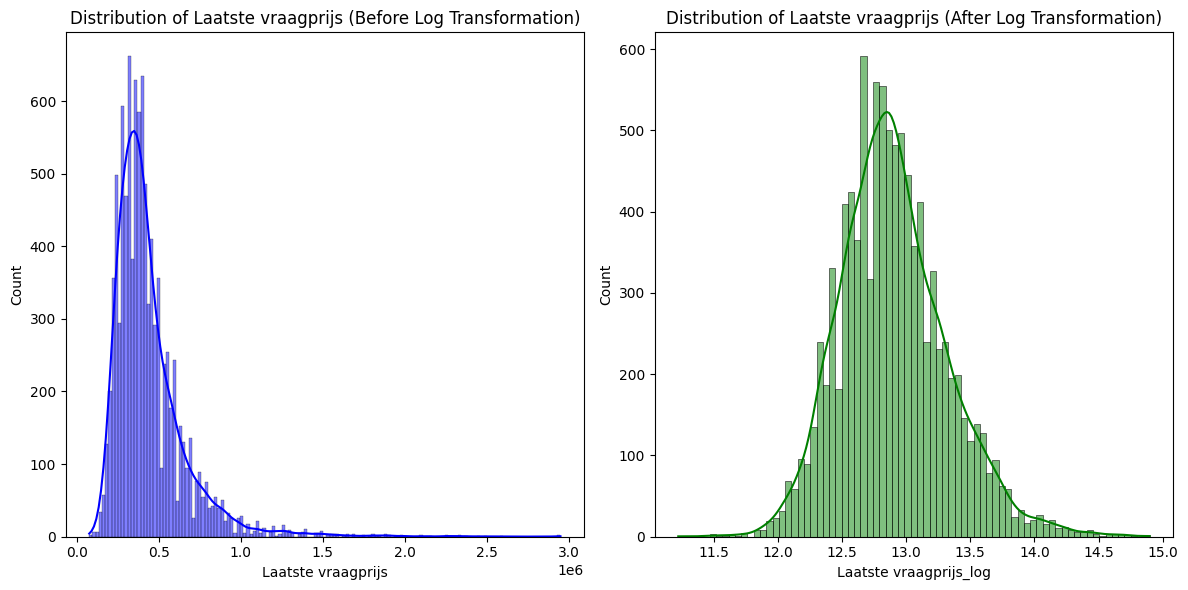

In [7]:
from scipy.stats import skew
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


path = 'Funda_dataset_cleaned.csv'
data = pd.read_csv(path)

# Target variable
column_of_interest = 'Laatste vraagprijs'

#  skewness before log transformation
skewness_before = skew(data[column_of_interest].dropna())

#  distribution before log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data[column_of_interest].dropna(), kde=True, color='blue')
plt.title(f'Distribution of {column_of_interest} (Before Log Transformation)')

# log transformation
data['Laatste vraagprijs_log'] = np.log1p(data['Laatste vraagprijs'].dropna())

#  skewness after log transformation
skewness_after = skew(data['Laatste vraagprijs_log'].dropna())

# distribution after log transformation
plt.subplot(1, 2, 2)
sns.histplot(data['Laatste vraagprijs_log'].dropna(), kde=True, color='green')
plt.title(f'Distribution of {column_of_interest} (After Log Transformation)')

print(f"Skewness before log transformation: {skewness_before}")
print(f"Skewness after log transformation: {skewness_after}")

plt.tight_layout()
plt.show()



In [8]:
data.shape

(9884, 113)

In [9]:
data.describe()

,Laatste vraagprijs,Aantal kamers,Overige inpandige ruimte m2,Perceel m2,Achtertuin m2,Vraagprijs per m2,Woonruimte in m2,Gebouwgebonden buitenruimte in m2,Externe bergruimte in m2,Inhoud in m3,...,Soort garage_Inpandig,Soort garage_Parkeerkelder,Soort garage_Garagebox,Soort garage_Aangebouwdestenen garage,Soort garage_Carport,Soort garage_Vrijstaandestenen garage,Soort garage_Vrijstaandehouten garage,Soort garage_Garagemet carport,Soort garage_Souterrain,Laatste vraagprijs_log
count,9.884000e+03,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,...,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000,9884.000000
mean,4.405701e+05,4.552914,7.844800,360.872420,212.892351,3961.701943,114.980170,6.928571,10.200931,427.018312,...,0.047855,0.034804,0.007386,0.107952,0.046439,0.083974,0.013760,0.007183,0.001113,12.900714
std,2.239829e+05,1.447637,22.110802,1521.408619,1437.220740,1526.078039,42.775498,14.375402,23.477484,206.104936,...,0.213470,0.183292,0.085626,0.310336,0.210444,0.277363,0.116497,0.084454,0.033343,0.418593
min,7.500000e+04,1.000000,0.000000,17.000000,0.000000,874.000000,17.000000,0.000000,0.000000,48.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.225257
25%,3.000000e+05,4.000000,0.000000,100.000000,0.000000,2974.000000,87.000000,0.000000,0.000000,308.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.611541
50%,3.890000e+05,5.000000,0.000000,153.000000,56.000000,3615.000000,112.000000,2.000000,6.000000,400.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.871337
75%,5.100000e+05,5.000000,10.000000,265.000000,104.000000,4487.000000,135.000000,10.000000,11.000000,503.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.142168
max,2.950000e+06,16.000000,709.000000,70922.000000,70623.000000,14352.000000,598.000000,897.000000,809.000000,4051.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.897316


In [10]:
print(data.dtypes.unique())

[dtype('O') dtype('int64') dtype('float64')]


#remove duplicate rows

In [11]:

num_duplicates = data.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


data.drop_duplicates(inplace=True)

Number of duplicate rows: 13


# Drop time variables

In [12]:
data.drop(['Aangeboden sinds', 'Verkoopdatum'], axis=1, inplace=True)

## **1- Normality Test of the Target variable**

<ipython-input-13-10a6bb0f0cdd>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=False, fit=distribution)


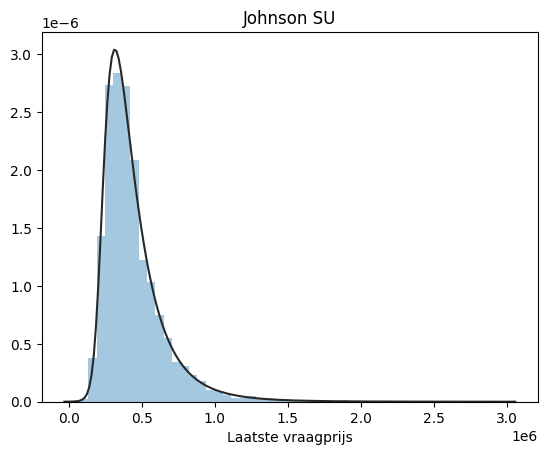

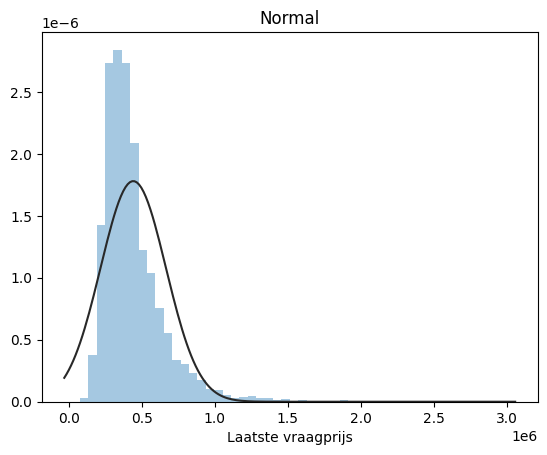

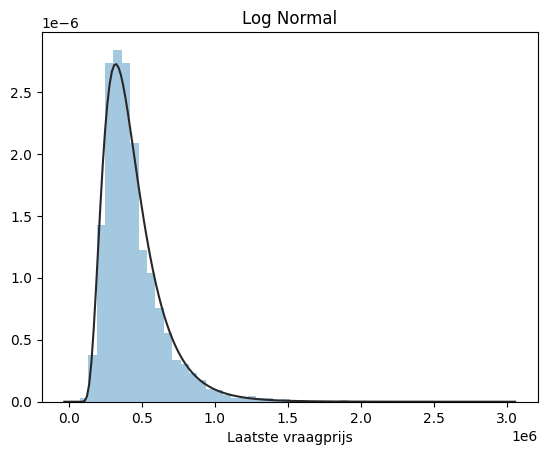

In [13]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import scipy.stats as st

# def plot_distribution_fit(data, distribution, title):
#     plt.figure()
#     plt.title(title)
#     sns.distplot(data, kde=False, fit=distribution)

# # target variable
# y = data['Laatste vraagprijs']

# # Plot different distribution fits
# plot_distribution_fit(y, st.johnsonsu, 'Johnson SU')
# plot_distribution_fit(y, st.norm, 'Normal')
# plot_distribution_fit(y, st.lognorm, 'Log Normal')

# # Show the plots
# plt.show()

## **2- Feature Selection**

In [14]:
data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')
cor=data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')

<ipython-input-14-0d96d7b49067>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')
<ipython-input-14-0d96d7b49067>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')


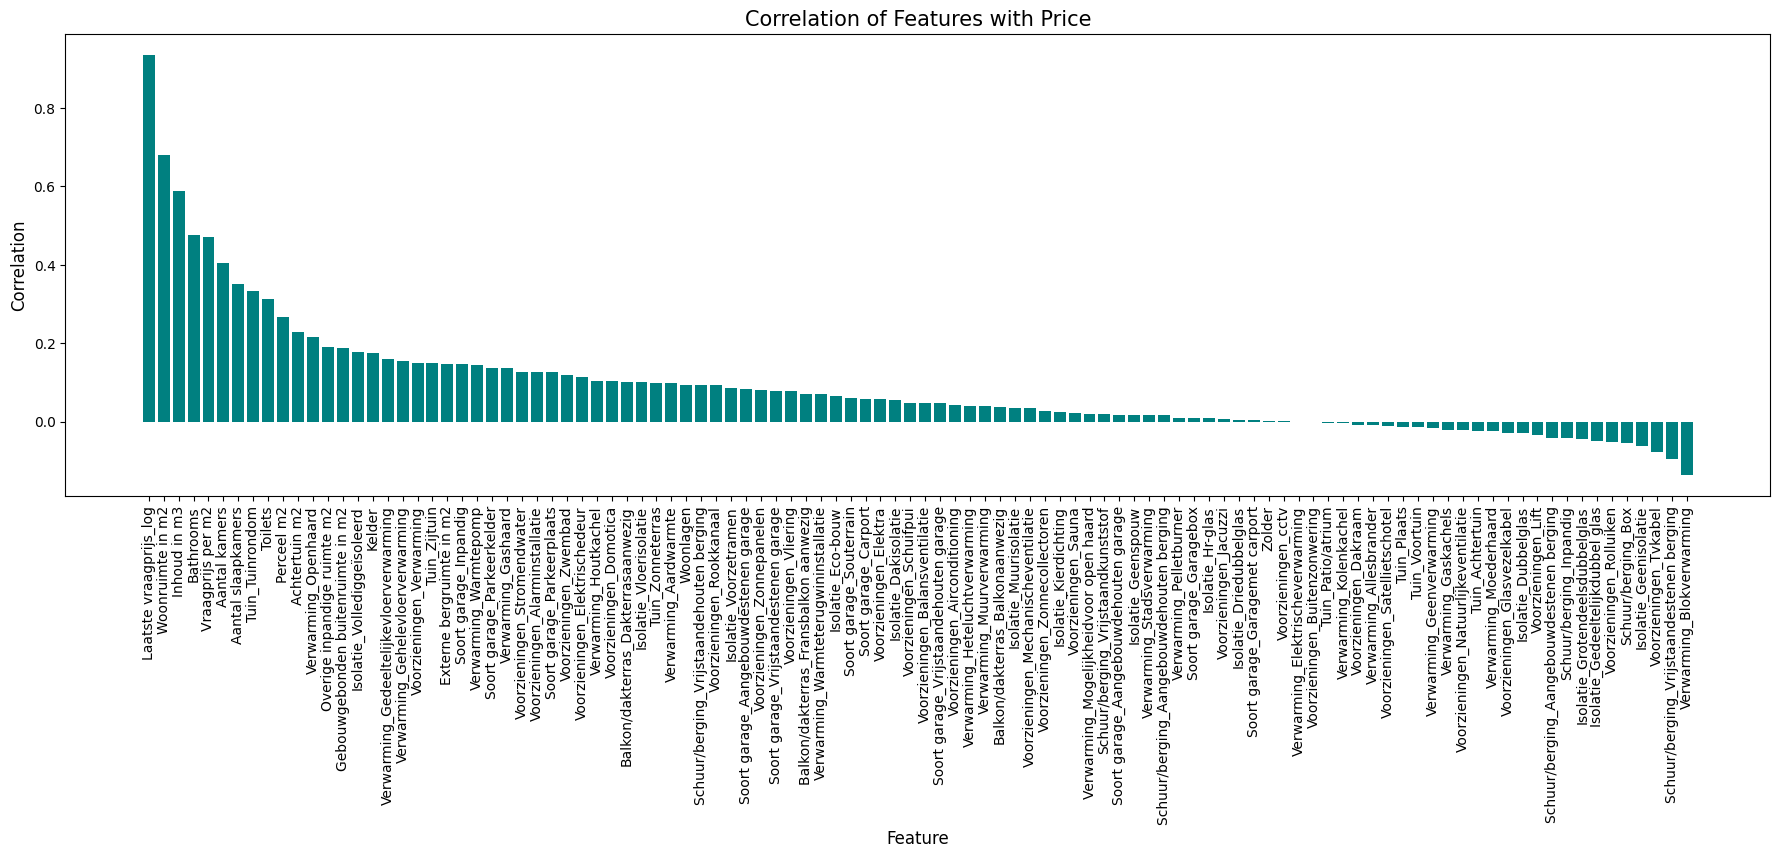

In [15]:
plt.figure(figsize=(22,6))
plt.bar(x=list(cor.index), height=list(cor.values), color='teal')
plt.xticks(rotation=90)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
plt.title('Correlation of Features with Price', fontsize=15)
plt.show()

## **3- Drop less than 0.1 correlated**

<ipython-input-27-d093fc9e6205>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()
<ipython-input-27-d093fc9e6205>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sorted_features = data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')


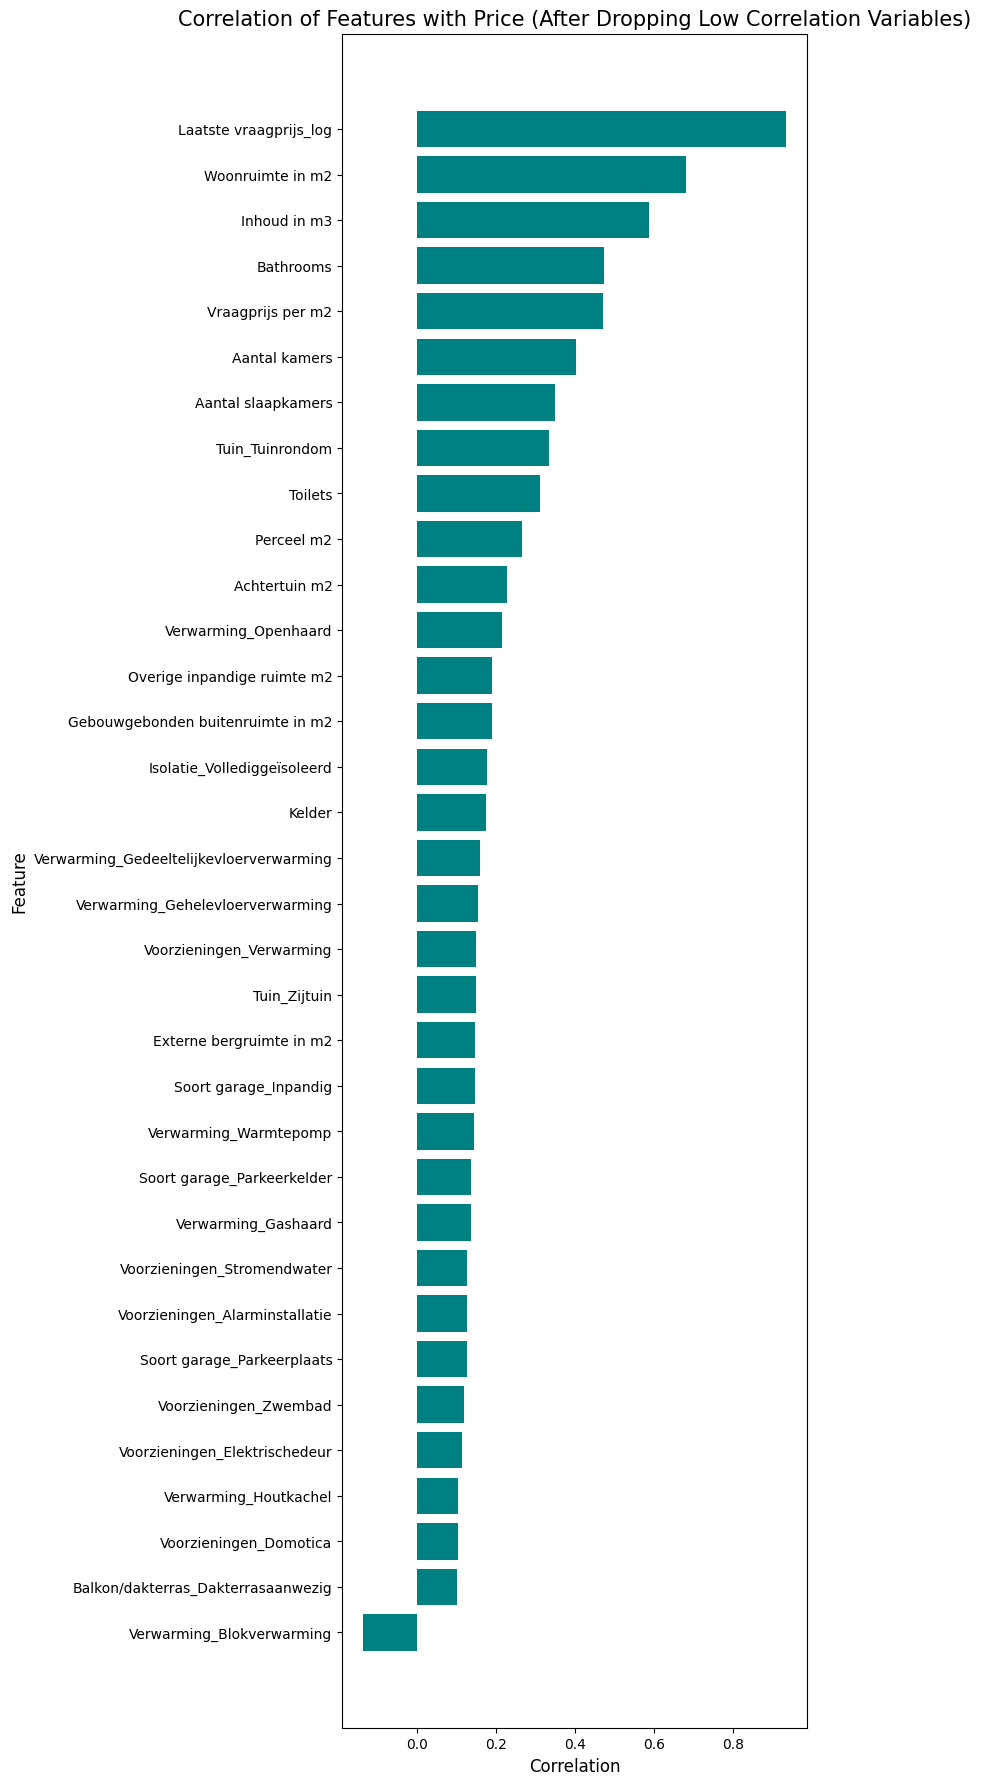

In [27]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Select the variables that have a correlation less than 0.1 with the target variable
drop_list = corr_matrix[corr_matrix['Laatste vraagprijs'].abs() < 0.1].index.to_list()

# Drop the variables from the data
data = data.drop(drop_list, axis=1)

# Plot the correlation matrix of the remaining variables vertically with highest correlation on top
plt.figure(figsize=(6, 22))
sorted_features = data.corr()['Laatste vraagprijs'].sort_values(ascending=False).drop('Laatste vraagprijs')
plt.barh(y=sorted_features.index[::-1], width=sorted_features.values[::-1], color='teal')  # Reverse the order
plt.ylabel('Feature', fontsize=12)  # Change to ylabel
plt.xlabel('Correlation', fontsize=12)  # Change to xlabel
plt.title('Correlation of Features with Price (After Dropping Low Correlation Variables)', fontsize=15)
plt.show()


## **4- Detect and remove outliers**

In [ ]:
# import pandas as pd
# from scipy import stats


# # Specify the numerical columns for outlier detection
# numeric_columns = data.select_dtypes(include='number').columns

# # Calculate Z-scores for each numeric column
# z_scores = stats.zscore(data[numeric_columns])

# # Define a threshold for Z-score (e.g., 3, which corresponds to 3 standard deviations)
# threshold = 3

# # Find and print the indices of outliers
# outlier_indices = (z_scores > threshold).any(axis=1)
# #print("Indices of outliers:", data.index[outlier_indices].tolist())

# # Filter the DataFrame to exclude outliers
# data_no_outliers = data[~outlier_indices]

# # Optionally, you can remove outliers directly from the original DataFrame
# data.drop(data.index[outlier_indices], inplace=True)


# **Split Target variable from the data**

In [ ]:
X = data.drop('Laatste vraagprijs',axis=1)
y = data['Laatste vraagprijs']

X.head()
X.describe()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9871 entries, 0 to 9883
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Status                                   9871 non-null   object
 1   Soort bouw                               9871 non-null   object
 2   Aantal kamers                            9871 non-null   int64 
 3   Energielabel                             9871 non-null   object
 4   Overige inpandige ruimte m2              9871 non-null   int64 
 5   Perceel m2                               9871 non-null   int64 
 6   Achtertuin m2                            9871 non-null   int64 
 7   Aantal dagen tot verkoop                 9871 non-null   object
 8   Vraagprijs per m2                        9871 non-null   int64 
 9   Woonruimte in m2                         9871 non-null   int64 
 10  Gebouwgebonden buitenruimte in m2        9871 non-null   int

## **Box plot of the Target variable**

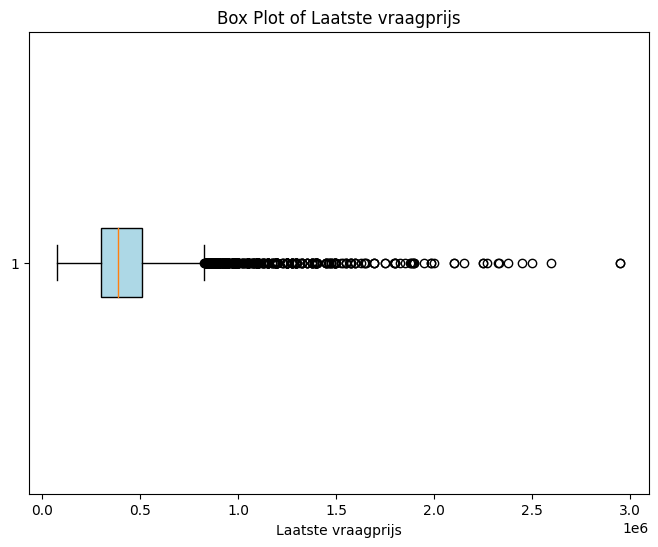

In [ ]:
import matplotlib.pyplot as plt

# Assuming X and y are defined
X = data.drop('Laatste vraagprijs', axis=1)
y = data['Laatste vraagprijs']

# Box plot for the target variable with color
plt.figure(figsize=(8, 6))
box = plt.boxplot(y, vert=False, patch_artist=True)
plt.title('Box Plot of Laatste vraagprijs')
plt.xlabel('Laatste vraagprijs')


colors = ['lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

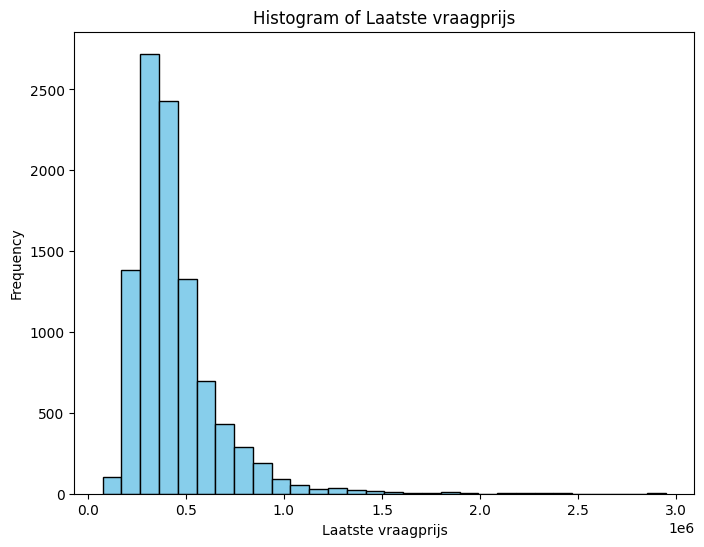

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Laatste vraagprijs')
plt.xlabel('Laatste vraagprijs')
plt.ylabel('Frequency')
plt.show()


# **Transform Categorical variables by encoding**

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # transformers
# numerical_transformer = Pipeline([
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('impute', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Select categorical columns with fewer than 1000 unique values
# categorical_col = [col for col in X_train_full.columns if X_train_full[col].dtype == 'O' and X_train_full[col].nunique() < 1000]
# # Print the selected categorical columns
# print("Categorical Columns:")
# print(categorical_col)

# # Select numerical columns
# numerical_col = [col for col in X_train_full.columns if X_train_full[col].dtype in ['float64', 'int64']]
# # Print the selected numerical columns
# print("Numerical Columns:")
# print(numerical_col)

# # Combine selected categorical and numerical columns
# my_cols = categorical_col + numerical_col
# # Create the preprocessor using ColumnTransformer
# preprocessor = ColumnTransformer(transformers=[
#     ('num', numerical_transformer, numerical_col),
#     ('cat', categorical_transformer, categorical_col)])


# eval_set_pipe = Pipeline([
#     ('preprocessor', preprocessor)
# ])

Categorical Columns:
['Status', 'Soort bouw', 'Energielabel', 'Aantal dagen tot verkoop', 'Soort dak', 'Soort woonhuis']
Numerical Columns:
['Aantal kamers', 'Overige inpandige ruimte m2', 'Perceel m2', 'Achtertuin m2', 'Vraagprijs per m2', 'Woonruimte in m2', 'Gebouwgebonden buitenruimte in m2', 'Externe bergruimte in m2', 'Inhoud in m3', 'Aantal slaapkamers', 'Bathrooms', 'Toilets', 'Kelder', 'Voorzieningen_Domotica', 'Voorzieningen_Zwembad', 'Voorzieningen_Verwarming', 'Voorzieningen_Stromendwater', 'Voorzieningen_Elektrischedeur', 'Voorzieningen_Alarminstallatie', 'Isolatie_Vollediggeïsoleerd', 'Verwarming_Gedeeltelijkevloerverwarming', 'Verwarming_Warmtepomp', 'Verwarming_Gehelevloerverwarming', 'Verwarming_Blokverwarming', 'Verwarming_Gashaard', 'Verwarming_Openhaard', 'Verwarming_Houtkachel', 'Balkon/dakterras_Dakterrasaanwezig', 'Tuin_Zijtuin', 'Tuin_Tuinrondom', 'Soort garage_Parkeerplaats', 'Soort garage_Inpandig', 'Soort garage_Parkeerkelder']


In [ ]:

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numerical_transformer, numerical_col),
#  ('cat', categorical_transformer, categorical_col)])


# eval_set_pipe = Pipeline([
#     ('preprocessor', preprocessor)
# ])

# **Correlation Matrix**

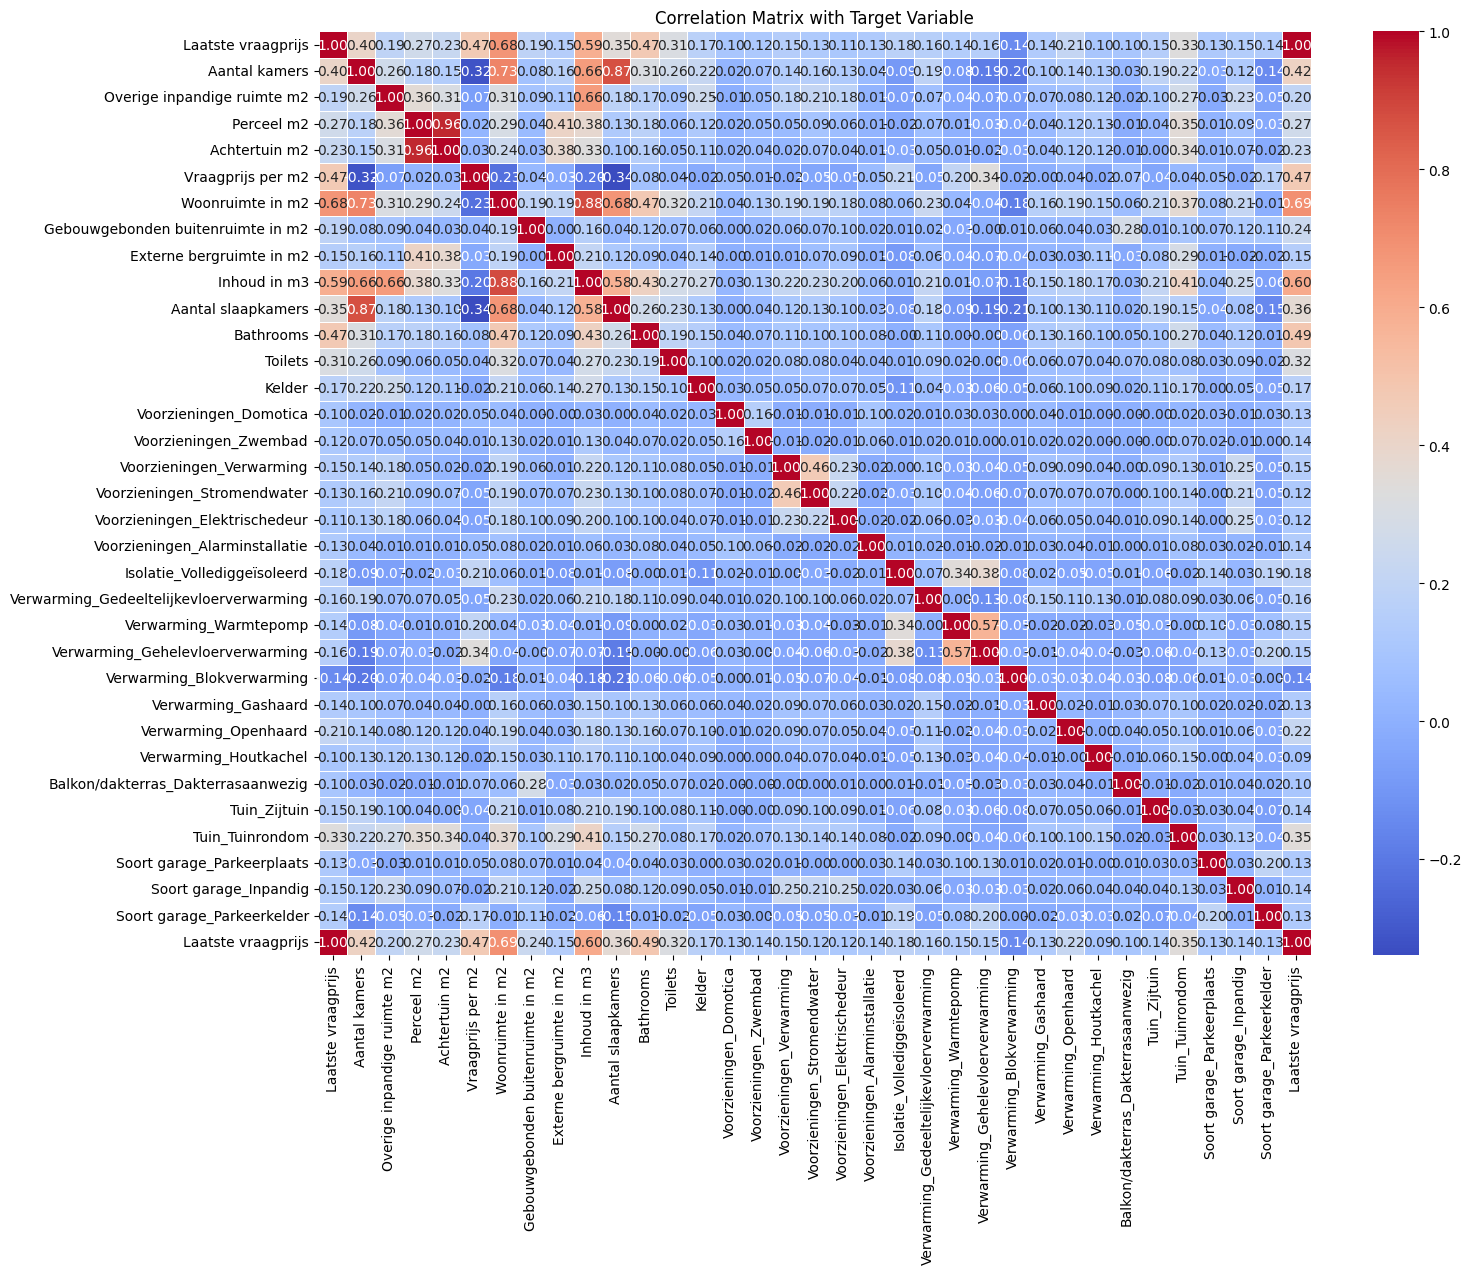

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the correlation matrix (excluding specified categorical columns)
selected_cols = [col for col in data.columns if col not in ['Status', 'Soort bouw', 'Energielabel', 'Soort dak', 'Soort woonhuis', 'Aantal dagen tot verkoop']]

# Concatenate the selected features and the target variable
correlation_data = pd.concat([data[selected_cols], y_train], axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix with Target Variable')

# Save the plot as a PNG file with good quality
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')


plt.show()


In [ ]:
correlation_matrix

,Laatste vraagprijs,Aantal kamers,Overige inpandige ruimte m2,Perceel m2,Achtertuin m2,Vraagprijs per m2,Woonruimte in m2,Gebouwgebonden buitenruimte in m2,Externe bergruimte in m2,Inhoud in m3,...,Verwarming_Gashaard,Verwarming_Openhaard,Verwarming_Houtkachel,Balkon/dakterras_Dakterrasaanwezig,Tuin_Zijtuin,Tuin_Tuinrondom,Soort garage_Parkeerplaats,Soort garage_Inpandig,Soort garage_Parkeerkelder,Laatste vraagprijs
Laatste vraagprijs,1.000000,0.403485,0.189853,0.265546,0.227121,0.470889,0.680477,0.188680,0.147625,0.587934,...,0.135400,0.214622,0.104101,0.101379,0.148473,0.333808,0.125358,0.146249,0.137062,1.000000
Aantal kamers,0.403485,1.000000,0.262571,0.178384,0.145036,-0.315132,0.729548,0.080104,0.162053,0.659455,...,0.103522,0.143505,0.127386,0.027652,0.191973,0.220903,-0.028338,0.122406,-0.137400,0.419780
Overige inpandige ruimte m2,0.189853,0.262571,1.000000,0.357870,0.306590,-0.072275,0.314044,0.091516,0.109424,0.659822,...,0.073711,0.082472,0.122885,-0.015283,0.102542,0.273998,-0.025212,0.234032,-0.052957,0.199417
Perceel m2,0.265546,0.178384,0.357870,1.000000,0.957083,0.021824,0.294644,0.044259,0.411631,0.382359,...,0.040296,0.123525,0.134611,-0.013175,0.036179,0.354958,0.014280,0.085427,-0.026149,0.265611
Achtertuin m2,0.227121,0.145036,0.306590,0.957083,1.000000,0.029316,0.244545,0.029040,0.380769,0.330815,...,0.037538,0.115589,0.115967,-0.011282,0.002343,0.341187,0.013313,0.067525,-0.024190,0.229452
Vraagprijs per m2,0.470889,-0.315132,-0.072275,0.021824,0.029316,1.000000,-0.227268,0.042245,-0.030713,-0.201955,...,-0.000015,0.038992,-0.021642,0.068534,-0.044011,0.039843,0.050714,-0.024707,0.168775,0.466371
Woonruimte in m2,0.680477,0.729548,0.314044,0.294644,0.244545,-0.227268,1.000000,0.187244,0.193793,0.880273,...,0.161080,0.194161,0.152560,0.062384,0.206941,0.366789,0.083185,0.211428,-0.007846,0.691645
Gebouwgebonden buitenruimte in m2,0.188680,0.080104,0.091516,0.044259,0.029040,0.042245,0.187244,1.000000,0.004079,0.161993,...,0.056177,0.039620,0.032971,0.282948,0.009088,0.102168,0.068394,0.119842,0.110414,0.236939
Externe bergruimte in m2,0.147625,0.162053,0.109424,0.411631,0.380769,-0.030713,0.193793,0.004079,1.000000,0.207081,...,0.025089,0.025578,0.106972,-0.030733,0.084814,0.292066,0.005447,-0.022240,-0.018532,0.151367
Inhoud in m3,0.587934,0.659455,0.659822,0.382359,0.330815,-0.201955,0.880273,0.161993,0.207081,1.000000,...,0.153220,0.180787,0.170738,0.034219,0.211061,0.411487,0.044637,0.246541,-0.064841,0.603557
